In [1]:
from importlib import reload
import objets as o 
from numpy import * 
import matplotlib.pyplot as plt


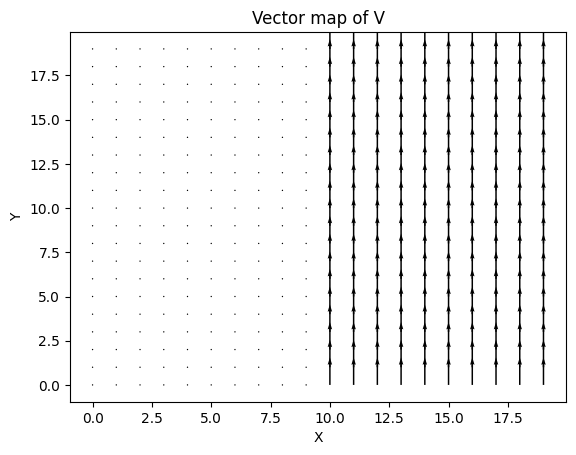

In [21]:
reload(o)
nx = 20
dt = 1/(nx**2)/10
t_end = 5
mu = 4
V = zeros((nx,nx,2))
for i in range(nx):
    for j in range(nx):
        V[i, j, 0] = 0# sin((j/nx)**0.5*pi-2*pi/3)  # Constant velocity in x-direction
        
        V[i, j, 1] = 1*j>=nx/2# -4*log(1+i)/nx # No velocity in y-direction

X, Y = meshgrid(range(nx), range(nx))
plt.quiver(X, Y, V[:,:,0], V[:,:,1])
plt.title('Vector map of V')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [22]:

ORDRE = 4
ANIM = 0

pol_ini = o.initial_conditions_2D(nx)

grille = o.Grid(nx,nx,dx=10/nx,dy=10/nx)
for i in range(nx) : 
    for j in range(nx) : 
        grille.set_pol(array([pol_ini[i,j]]),x=i,y=j)

grille.set_V(V)


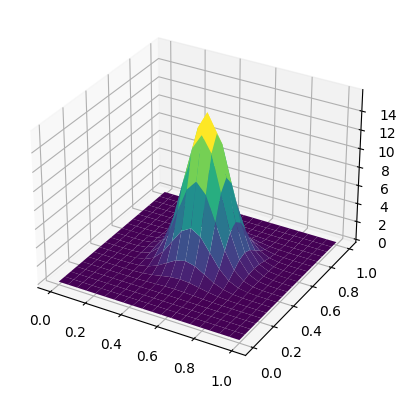

In [23]:
X = linspace(0,1,nx)
Y = X 
X,Y = meshgrid(X,Y)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X,Y,grille.get_pol(),cmap="viridis")
plt.show()

In [24]:
reload(o)
res = o.solver(grille,dt,t_end,mu,V,ORDRE).solve()
# plt.plot(linspace(0,1,grille.nx),res[0])
# plt.plot(linspace(0,1,grille.nx),res[-5])
# plt.show()


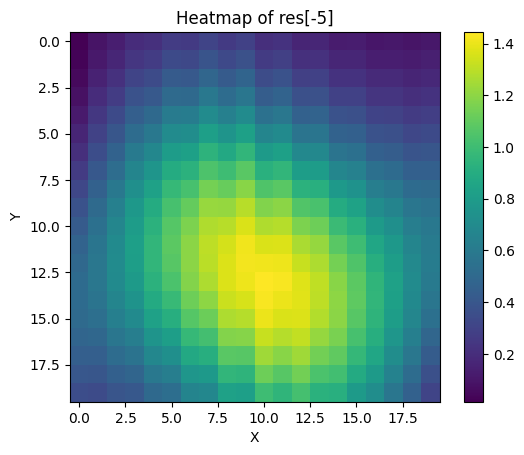

In [25]:
plt.imshow(res[-5], cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Heatmap of res[-5]')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [26]:
reload(o)
# plot(linspace(0,1,test.nx),abs(res[-5]-res[0]))
# show()

if ANIM :
    N = t_end/dt 
    fps = 50
    N_cible = t_end*fps 
    T = linspace(0,t_end,N_cible+10)    
    o.anim_surface(res[::int(N//N_cible)],grille,fps=fps,name=f"nx{nx}-mu{mu}-V{V.max()}-order{ORDRE}.mp4",T=T)